In [353]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import copy

import seaborn as sns
sns.set(rc={'figure.figsize':(13, 7.5)})

In [354]:
# Tạo dữ liệu 
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
x,12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72
y,39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24


In [355]:
# Số cluster 
k = 5

In [356]:
colors = cm.rainbow(np.linspace(0, 1, k))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.96078431e-03, 7.09281308e-01, 9.23289106e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 7.00543038e-01, 3.78411050e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [357]:
# Chọn ngẫu nhiên K điểm center từ data
def create_center(k):
    r = []
    for i in range(k): r.append(np.random.randint(0, len(df)))
    print(r)
    centroids = {
        i+1: [df['x'][r[i]], df['y'][r[i]]]
        for i in range(k)
    }
    #print(centroids)
    return centroids

In [358]:
centroids = create_center(k)
centroids

[13, 8, 15, 14, 15]


{1: [53, 23], 2: [45, 63], 3: [61, 8], 4: [55, 14], 5: [61, 8]}

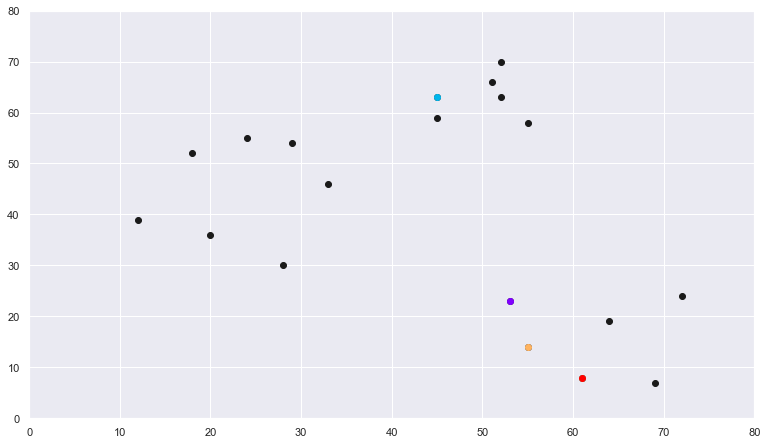

In [359]:
# Vẽ biểu đồ 
plt.scatter(df['x'], df['y'], color='k')
# Vẽ biểu đồ với 3 điểm center
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colors[i-1])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()
#ax.legend(fontsize='small')

In [360]:
# Hàm tính khoảng cách từ mỗi điểm dữ liệu đến mỗi center
def assigment(df, centroids):
    for i in centroids.keys():
        #sqrt((x1-x2)^2 - (y1-y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0])**2 +
                (df['y'] - centroids[i][1])**2
            )  
        )     
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1) # Tìm cluter center gần nhất 
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # Bỏ đi các ký tự distance_from_
    df['color'] = df['closest'].map(lambda x: colors[x-1]) # Set màu tương tự center
    return df
    
df = assigment(df, centroids)
print(df)

     x   y  distance_from_1  distance_from_2  distance_from_3  \
0   12  39        44.011362        40.804412        57.982756   
1   20  36        35.468296        36.796739        49.648766   
2   28  30        25.961510        37.121422        39.661064   
3   18  52        45.453273        29.154759        61.522354   
4   29  54        39.204592        18.357560        56.035703   
5   33  46        30.479501        20.808652        47.201695   
6   24  55        43.185646        22.472205        59.816386   
7   45  59        36.878178         4.000000        53.450912   
8   45  63        40.792156         0.000000        57.280014   
9   52  70        47.010637         9.899495        62.649820   
10  51  66        43.046487         6.708204        58.855756   
11  52  63        40.012498         7.000000        55.731499   
12  55  58        35.057096        11.180340        50.358713   
13  53  23         0.000000        40.792156        17.000000   
14  55  14         9.2195

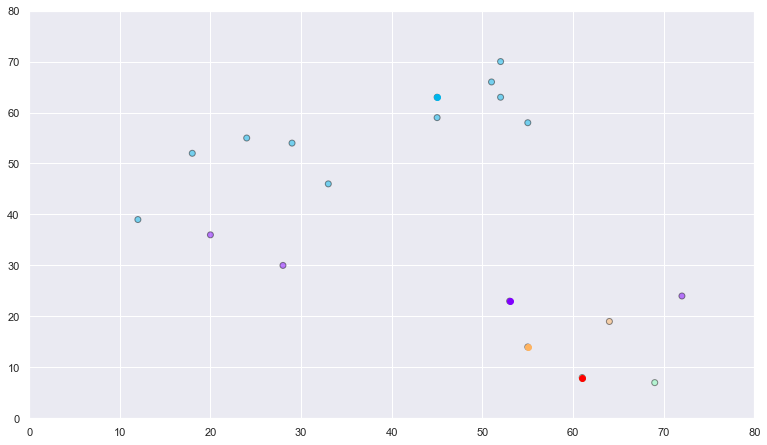

In [361]:
def plot_show():
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
plot_show()

In [362]:
old_centroids = copy.deepcopy(centroids)

# Update tọa độ mỗi center sau mỗi vòng lặp 
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
print(centroids)

{1: [43.25, 28.25], 2: [37.81818181818182, 56.81818181818182], 3: [65.0, 7.5], 4: [59.5, 16.5], 5: [nan, nan]}


     x   y  distance_from_1  distance_from_2  distance_from_3  \
0   12  39        33.047315        31.369828        61.654278   
1   20  36        24.507652        27.402268        53.265843   
2   28  30        15.350081        28.558914        43.304157   
3   18  52        34.664463        20.395470        64.724416   
4   29  54        29.430002         9.257563        58.806887   
5   33  46        20.496951        11.842632        50.062461   
6   24  55        32.956411        13.937286        62.747510   
7   45  59        30.799756         7.505921        55.247172   
8   45  63        34.794037         9.475937        58.993644   
9   52  70        42.657063        19.361929        63.837685   
10  51  66        38.537320        16.064436        60.151891   
11  52  63        35.834690        15.470580        57.002193   
12  55  58        31.986325        17.222415        51.480579   
13  53  23        11.073617        37.069624        19.602296   
14  55  14        18.4695

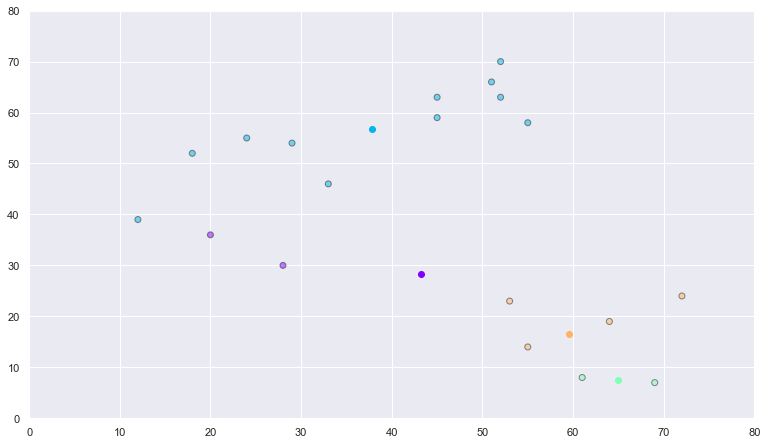

{1: [24.0, 33.0], 2: [37.81818181818182, 56.81818181818182], 3: [65.0, 7.5], 4: [61.0, 20.0], 5: [nan, nan]}


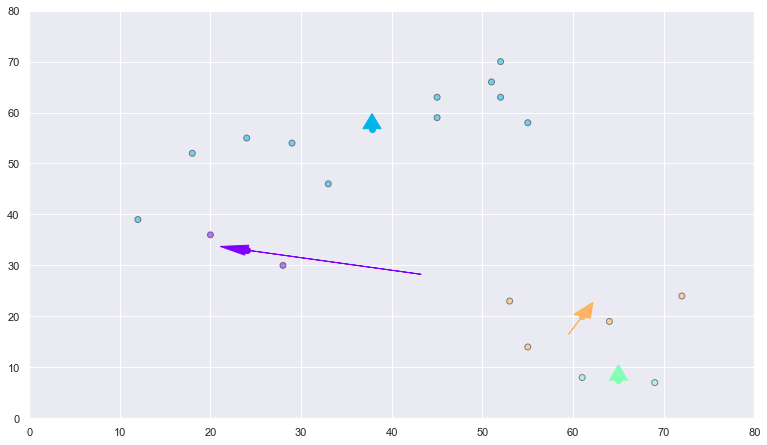

     x   y  distance_from_1  distance_from_2  distance_from_3  \
0   12  39        13.416408        31.369828        61.654278   
1   20  36         5.000000        27.402268        53.265843   
2   28  30         5.000000        28.558914        43.304157   
3   18  52        19.924859        20.395470        64.724416   
4   29  54        21.587033         9.257563        58.806887   
5   33  46        15.811388        11.842632        50.062461   
6   24  55        22.000000        13.937286        62.747510   
7   45  59        33.421550         7.505921        55.247172   
8   45  63        36.619667         9.475937        58.993644   
9   52  70        46.400431        19.361929        63.837685   
10  51  66        42.638011        16.064436        60.151891   
11  52  63        41.036569        15.470580        57.002193   
12  55  58        39.824616        17.222415        51.480579   
13  53  23        30.675723        37.069624        19.602296   
14  55  14        36.3593

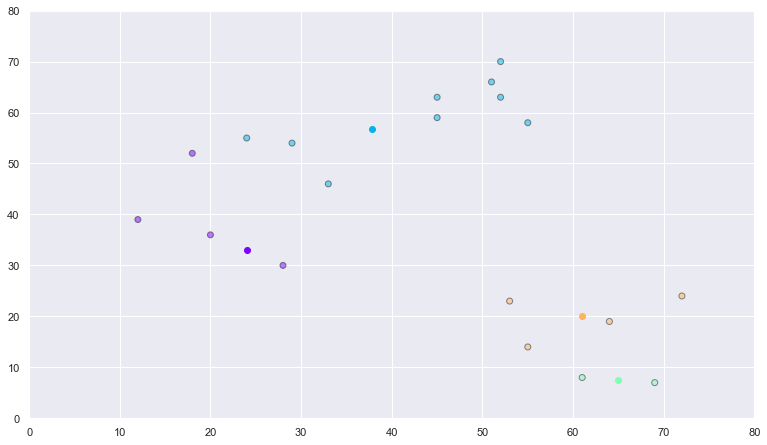

{1: [19.5, 39.25], 2: [42.888888888888886, 59.333333333333336], 3: [65.0, 7.5], 4: [61.0, 20.0], 5: [nan, nan]}


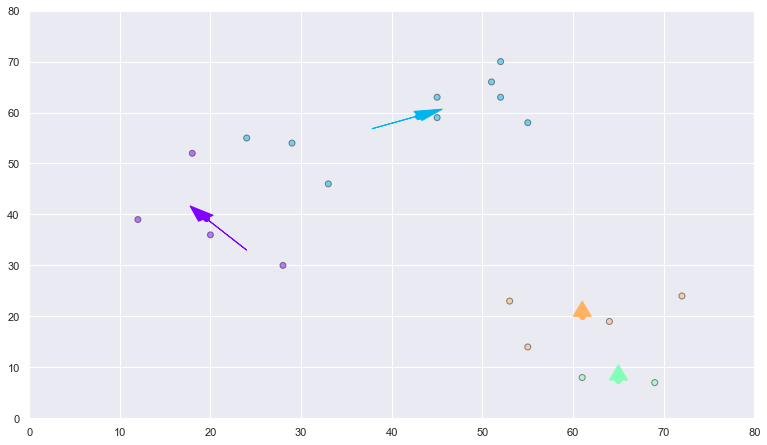

     x   y  distance_from_1  distance_from_2  distance_from_3  \
0   12  39         7.504166        36.980642        61.654278   
1   20  36         3.288237        32.685558        53.265843   
2   28  30        12.562345        32.895645        43.304157   
3   18  52        12.837932        25.946764        64.724416   
4   29  54        17.544586        14.877691        58.806887   
5   33  46        15.093459        16.600238        50.062461   
6   24  55        16.380247        19.379574        62.747510   
7   45  59        32.253876         2.137265        55.247172   
8   45  63        34.846987         4.230985        58.993644   
9   52  70        44.741619        14.028190        63.837685   
10  51  66        41.325688        10.499265        60.151891   
11  52  63        40.253105         9.821242        57.002193   
12  55  58        40.147385        12.184285        51.480579   
13  53  23        37.233218        37.713998        19.602296   
14  55  14        43.5638

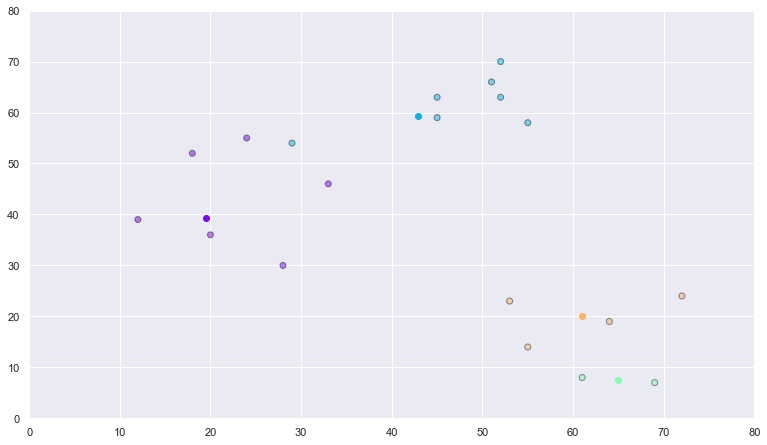

{1: [22.5, 43.0], 2: [47.0, 61.857142857142854], 3: [65.0, 7.5], 4: [61.0, 20.0], 5: [nan, nan]}


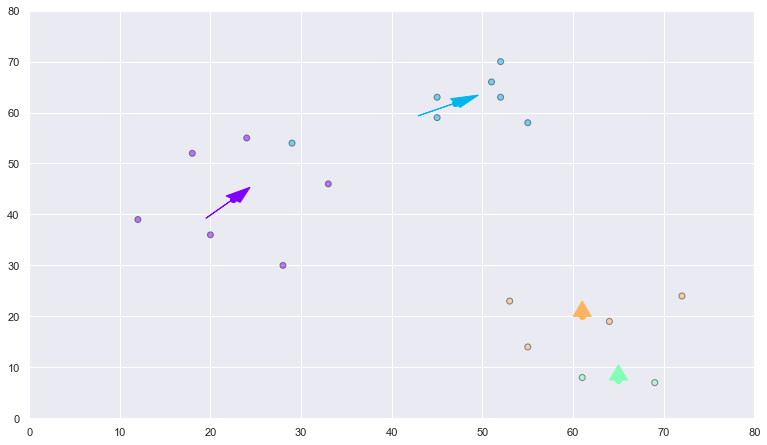

     x   y  distance_from_1  distance_from_2  distance_from_3  \
0   12  39        11.236103        41.802500        61.654278   
1   20  36         7.433034        37.384380        53.265843   
2   28  30        14.115594        37.092823        43.304157   
3   18  52        10.062306        30.629451        64.724416   
4   29  54        12.776932        19.640130        58.806887   
5   33  46        10.920165        21.152990        50.062461   
6   24  55        12.093387        24.000425        62.747510   
7   45  59        27.608875         3.487587        55.247172   
8   45  63        30.103986         2.303502        58.993644   
9   52  70        39.990624         9.555424        63.837685   
10  51  66        36.623080         5.758756        60.151891   
11  52  63        35.640567         5.128949        57.002193   
12  55  58        35.794553         8.881303        51.480579   
13  53  23        36.472592        39.317649        19.602296   
14  55  14        43.5574

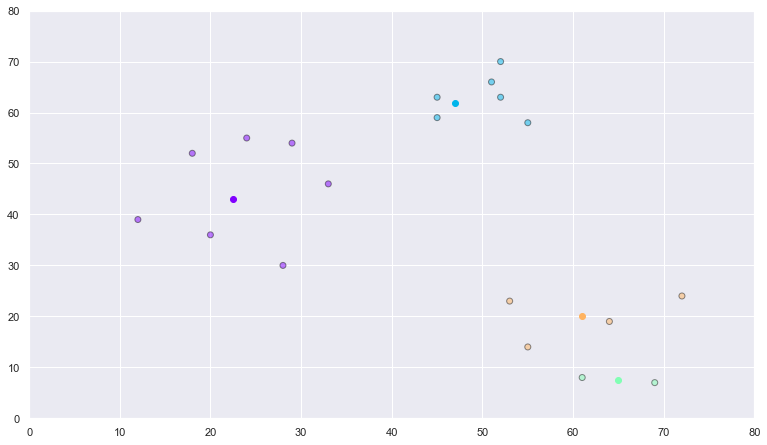

{1: [23.428571428571427, 44.57142857142857], 2: [50.0, 63.166666666666664], 3: [65.0, 7.5], 4: [61.0, 20.0], 5: [nan, nan]}


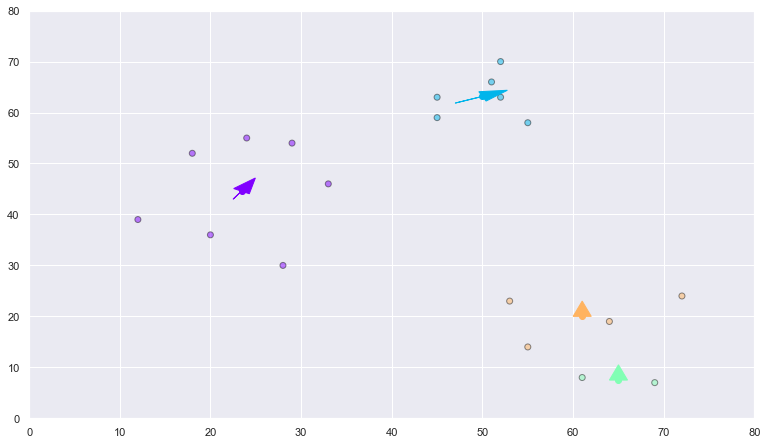

     x   y  distance_from_1  distance_from_2  distance_from_3  \
0   12  39        12.714286        45.033629        61.654278   
1   20  36         9.231711        40.472556        53.265843   
2   28  30        15.271689        39.799846        43.304157   
3   18  52         9.200710        33.892395        64.724416   
4   29  54        10.951656        22.913485        58.806887   
5   33  46         9.677451        24.159769        50.062461   
6   24  55        10.444215        27.252421        62.747510   
7   45  59        25.952075         6.508541        55.247172   
8   45  63        28.371443         5.002777        58.993644   
9   52  70        38.248383         7.120003        63.837685   
10  51  66        34.919441         3.004626        60.151891   
11  52  63        33.999100         2.006932        57.002193   
12  55  58        34.308623         7.189885        51.480579   
13  53  23        36.603223        40.278544        19.602296   
14  55  14        43.9473

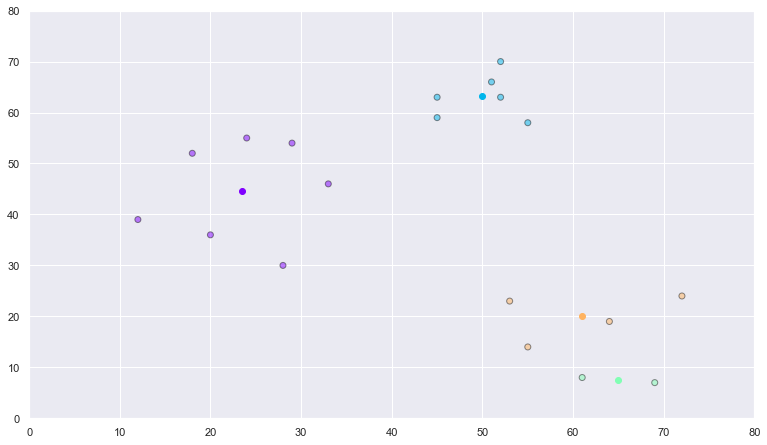

{1: [23.428571428571427, 44.57142857142857], 2: [50.0, 63.166666666666664], 3: [65.0, 7.5], 4: [61.0, 20.0], 5: [nan, nan]}


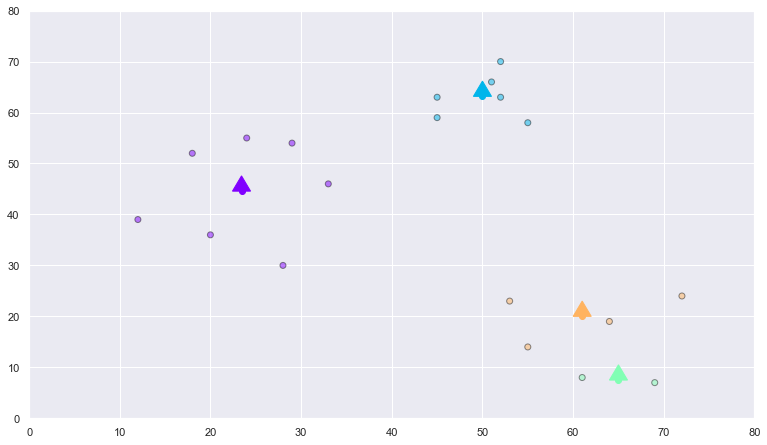

5

In [363]:
# Chạy K_means_clustering => điều kiện dừng khi tọa độ old_center = new_center
n = 0
while old_centroids != centroids:
    n = n +1
    df = assigment(df, centroids)
    print(df)
    old_centroids = copy.deepcopy(centroids)
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
    ax = plt.axes()
    centroids = update(centroids)
    print(centroids)
    
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    for i in old_centroids.keys():
        old_x = old_centroids[i][0]
        old_y = old_centroids[i][1]
        dx = centroids[i][0] - old_centroids[i][0]
        dy = centroids[i][1] - old_centroids[i][1]
        ax.arrow(old_x, old_y, dx, dy,head_width=2, head_length=3,  fc=colors[i-1], ec=colors[i-1])
    plt.show()
n 

----
# K Means Clutering trong dữ liệu đa chiều

In [364]:
d = 10 # số chiều
df = {
    i+1 : np.random.randint(0,100, size=100)
    for i in range(d)
}
df = pd.DataFrame(df)
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,31,13,71,76,45,80,66,85,2,0,...,59,90,33,68,39,62,6,78,67,23
2,20,66,84,57,97,4,47,99,33,79,...,77,97,59,88,91,86,66,17,60,73
3,37,27,11,54,49,52,28,18,31,51,...,10,20,24,49,85,1,52,25,20,1
4,95,19,50,94,1,85,26,97,54,20,...,34,17,20,8,84,53,83,2,53,54
5,74,44,55,2,41,43,87,58,55,76,...,6,50,60,72,73,8,19,73,41,82
6,19,11,82,55,21,12,40,21,37,82,...,45,20,0,65,37,21,86,87,66,41
7,87,17,10,84,72,16,6,73,62,69,...,10,79,96,42,89,72,74,61,55,81
8,96,82,35,4,50,44,94,11,62,40,...,12,83,72,61,94,62,15,99,97,34
9,2,81,84,63,48,12,49,60,98,67,...,99,98,45,32,82,68,27,62,46,67
10,66,85,72,54,39,89,80,96,71,37,...,47,85,32,17,52,72,97,6,63,15


In [365]:
# Số cluster 
k = 10

In [366]:
def center_array(D,row):
    x = []
    for d in range(D): x.append(df[d+1][row])
    return x

In [367]:
def create_center(k):
    r =  np.random.randint(0, len(df), size = k)
    #r = [10,3,12,32]
    print(r)
    centroids = {
        i+1: center_array(d,r[i])
        for i in range(k)
    }
    #print(centroids)
    return centroids

In [368]:
centroids = create_center(k)
centroids

[70 69 79  3 97 74  6 59 80 30]


{1: [50, 52, 45, 85, 61, 44, 3, 86, 1, 39],
 2: [39, 89, 33, 33, 22, 31, 53, 91, 23, 99],
 3: [26, 60, 14, 45, 90, 43, 25, 85, 38, 29],
 4: [76, 57, 54, 94, 2, 55, 84, 4, 63, 54],
 5: [78, 17, 25, 2, 73, 87, 61, 99, 62, 6],
 6: [73, 45, 86, 37, 32, 24, 64, 65, 94, 57],
 7: [66, 47, 28, 26, 87, 40, 6, 94, 49, 80],
 8: [98, 47, 44, 36, 96, 92, 40, 88, 23, 76],
 9: [45, 38, 94, 98, 89, 12, 83, 13, 28, 80],
 10: [34, 15, 92, 72, 11, 39, 6, 33, 38, 72]}

In [369]:
def distance_center(cluter):
    distance = 0
    for i in range(d-1):
        distance = distance + (df[i+1] - centroids[cluter][i])**2
    return np.sqrt(distance)

In [370]:
# Hàm tính khoảng cách từ mỗi điểm dữ liệu đến mỗi center
def assigment(df, centroids):
    for i in centroids.keys():
        #sqrt((x1-x2)^2 - (y1-y2)^2)
        df['distance_from_{}'.format(i)] = (
            distance_center(i)  
        )     
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1) # Tìm cluter center gần nhất 
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # Bỏ đi các ký tự distance_from_
    return df   
df = assigment(df, centroids)
df

,1,2,3,4,5,6,7,8,9,10,...,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,distance_from_7,distance_from_8,distance_from_9,distance_from_10,closest
0,31,20,37,95,74,19,87,96,2,66,...,114.695248,103.667738,149.525917,141.141773,141.056726,127.200629,131.434394,107.856386,140.652053,1
1,13,66,27,19,44,11,17,82,81,85,...,84.035707,78.179281,158.117045,126.972438,104.048066,84.846921,146.143765,162.757488,127.749755,3
2,71,84,11,50,55,82,10,35,84,72,...,119.239255,101.103907,122.290637,120.697970,122.995935,98.838252,112.222992,164.286335,138.188277,7
3,76,57,54,94,2,55,84,4,63,54,...,132.894695,158.319298,0.000000,162.877254,106.625513,165.317876,157.622968,116.888836,115.511904,4
4,45,97,49,1,41,21,72,50,48,39,...,67.141641,106.348484,128.050771,127.137721,92.994624,113.035393,133.108978,138.527976,140.370937,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,62,86,1,53,8,21,72,62,68,72,...,74.060786,114.240973,101.252160,135.281189,103.038828,123.846679,146.509385,155.019354,144.557947,2
96,6,66,52,83,19,86,74,15,27,97,...,117.243337,132.800602,88.729927,161.993827,138.938835,160.857079,153.505700,121.474277,111.570605,4
97,78,17,25,2,73,87,61,99,62,6,...,122.947143,104.000000,162.877254,0.000000,116.593310,85.164547,73.851202,174.424769,159.480406,5
98,67,60,20,53,41,66,55,97,46,63,...,65.946948,76.282370,119.783137,79.730797,100.632997,78.574805,80.814603,147.827602,129.803698,2


In [371]:
def new_center(cluter,d):
    for i in range(d):
        #print(i)
        centroids[cluter][i] = np.mean(df[df['closest'] == cluter][i+1])
        #print(np.mean(df[df['closest'] == cluter][i+1]))
    return

In [372]:
old_centroids = copy.deepcopy(centroids)

# Update tọa độ mỗi center sau mỗi vòng lặp 
def update(k):
    for cluter in centroids.keys():
        new_center(cluter,2)
    return k
centroids = update(centroids)
centroids

{1: [52.55555555555556, 34.333333333333336, 45, 85, 61, 44, 3, 86, 1, 39],
 2: [42.88235294117647, 67.58823529411765, 33, 33, 22, 31, 53, 91, 23, 99],
 3: [22.6, 52.8, 14, 45, 90, 43, 25, 85, 38, 29],
 4: [70.14285714285714, 69.42857142857143, 54, 94, 2, 55, 84, 4, 63, 54],
 5: [58.42857142857143, 22.428571428571427, 25, 2, 73, 87, 61, 99, 62, 6],
 6: [63.78947368421053, 54.36842105263158, 86, 37, 32, 24, 64, 65, 94, 57],
 7: [75.44444444444444, 48.22222222222222, 28, 26, 87, 40, 6, 94, 49, 80],
 8: [79.375, 44.875, 44, 36, 96, 92, 40, 88, 23, 76],
 9: [52.25, 45.5, 94, 98, 89, 12, 83, 13, 28, 80],
 10: [40.3, 36.5, 92, 72, 11, 39, 6, 33, 38, 72]}

In [350]:
n = 0
while old_centroids != centroids:
    n = n+1
    df = assigment(df, centroids) # tính khoảng cách và label các điểm dữ liệu
    old_centroids = copy.deepcopy(centroids) # copy các điểm center ra 1 tập mới
    centroids = update(centroids) # cập nhập các điểm center
n 

4

In [351]:
centroids

{1: [72.58823529411765, 63.8235294117647, 73, 25, 7, 71, 68, 32, 67, 54],
 2: [50.166666666666664, 26.583333333333332, 83, 28, 60, 29, 85, 25, 49, 1],
 3: [34.25, 32.75, 75, 65, 26, 21, 5, 73, 95, 17],
 4: [64.76923076923077, 51.42307692307692, 59, 97, 29, 69, 32, 42, 52, 79],
 5: [16.166666666666668, 48.5, 86, 66, 30, 50, 79, 32, 99, 26],
 6: [24.583333333333332, 67.41666666666667, 39, 43, 41, 1, 61, 84, 61, 26],
 7: [83.11111111111111, 42.77777777777778, 77, 93, 87, 46, 69, 26, 56, 39],
 8: [nan, nan, 59, 97, 29, 69, 32, 42, 52, 79],
 9: [57.285714285714285, 25.5, 2, 6, 14, 47, 48, 54, 51, 41],
 10: [nan, nan, 39, 43, 41, 1, 61, 84, 61, 26]}

In [352]:
df

,1,2,3,4,5,6,7,8,9,10,...,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,distance_from_7,distance_from_8,distance_from_9,distance_from_10,closest
0,72,80,11,65,63,95,84,95,69,29,...,139.817863,148.322706,108.770054,133.205147,117.084075,121.576933,NaN,121.469174,NaN,4
1,98,44,32,34,14,36,97,56,53,19,...,92.273333,133.740888,107.672587,118.848410,100.828306,113.363014,NaN,78.828314,NaN,1
2,34,81,82,9,24,15,4,13,52,24,...,108.584229,104.895782,121.080717,118.723535,110.155257,142.456448,NaN,121.546183,NaN,1
3,42,42,86,66,30,50,79,32,99,26,...,75.388116,91.091300,84.718547,26.638527,103.350603,88.038221,NaN,123.190515,NaN,5
4,95,77,39,8,50,14,13,28,3,14,...,120.506714,146.190372,127.722662,166.984863,123.811741,135.364346,NaN,109.716076,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,50,21,58,49,29,67,38,50,54,...,91.239802,109.795833,101.383134,88.906005,67.301663,114.334575,NaN,94.870078,NaN,6
96,84,87,12,72,63,95,97,28,3,23,...,135.668228,187.707552,114.558020,155.774231,150.332456,114.875563,NaN,137.977908,NaN,4
97,91,45,63,58,93,73,26,99,68,25,...,125.098100,112.261414,99.595729,137.703587,122.888895,97.852812,NaN,132.879280,NaN,7
98,65,16,71,92,54,8,62,34,47,35,...,75.253138,99.990625,82.212211,98.381627,103.039704,61.717597,NaN,126.648175,NaN,7
